In [54]:
import numpy as np # linear algebra
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
order=pd.read_excel('/content/AllKnn.xlsx')
order.head(20)

,วันที่ชำระเงิน,เวลาที่ชำระเงิน,Transaction ID,รหัสถาดเก็บเงิน,สินค้า,ประเภทการสั่งเครื่องดื่ม,ระดับความหวาน,สั่งเพิ่ม,ประเภทสินค้า,จำนวนสินค้า,...,ช่องทางการสั่ง,รวมยอดขายหน้าร้าน,รวมยอดขายในไลน์แมน,รวมยอดขายทั้งหมด,ต้นทุนของสินค้า,เดือน,วัน,ฤดูกาล,ชั่วโมง,ช่วงเวลา
0,2021-12-20,08:40:00,1HCNK,5QV,Latte,Cold,หวานปกติ,ว่าง,beverage,1,...,Dine-In,75,0,75,51.0,12,20,ฤดูหนาว,8,ช่วงเช้า
1,2021-12-20,13:36:00,YAJBZ,5QV,Latte,Cold,หวานปกติ,ว่าง,beverage,1,...,Dine-In,75,0,75,51.0,12,20,ฤดูหนาว,13,ช่วงเที่ยง
2,2021-12-20,16:37:00,YMIZL,5QV,Latte,Cold,หวานปกติ,ว่าง,beverage,1,...,Dine-In,75,0,75,51.0,12,20,ฤดูหนาว,16,ช่วงบ่าย
3,2021-12-22,09:24:00,8NF8U,H9A,Latte,Cold,หวานปกติ,ว่าง,beverage,1,...,Dine-In,75,0,75,51.0,12,22,ฤดูหนาว,9,ช่วงเช้า
4,2021-12-22,13:37:00,8CLC7,H9A,Latte,Cold,หวานปกติ,ว่าง,beverage,1,...,Dine-In,75,0,75,51.0,12,22,ฤดูหนาว,13,ช่วงเที่ยง
5,2021-12-22,17:33:00,L6CDQ,H9A,Latte,Cold,หวานปกติ,ว่าง,beverage,1,...,Dine-In,75,0,75,51.0,12,22,ฤดูหนาว,17,ช่วงบ่าย
6,2021-12-23,14:06:00,T1MCS,IBD,Latte,Cold,หวานปกติ,ว่าง,beverage,1,...,Dine-In,75,0,75,51.0,12,23,ฤดูหนาว,14,ช่วงบ่าย
7,2021-12-23,14:33:00,7854I,IBD,Latte,Cold,หวานปกติ,ว่าง,beverage,1,...,Dine-In,75,0,75,51.0,12,23,ฤดูหนาว,14,ช่วงบ่าย
8,2021-12-24,11:41:00,MYSMB,9OY,Latte,Cold,หวานปกติ,ว่าง,beverage,1,...,Dine-In,75,0,75,51.0,12,24,ฤดูหนาว,11,ช่วงเที่ยง
9,2021-12-25,10:51:00,DFIMX,AVH,Latte,Cold,หวานปกติ,ว่าง,beverage,1,...,Dine-In,75,0,75,51.0,12,25,ฤดูหนาว,10,ช่วงเช้า


In [55]:
product=pd.read_excel('/content/Product.xlsx')
product.head(15)

,ราคาสินค้า,ประเภทสินค้า,ชื่อเมนู,ราคาขายหน้าร้าน,ราคาขายLine Man,ต้นทุนสินค้า
0,100,beverage,Black honey lemon,100,110,68.00
1,135,cake,Blueberry crumble cheese,135,145,71.55
2,60,Croissants,Charcoal s,60,70,28.20
3,65,beverage,Black coffee,65,75,44.20
4,55,Croissants,Plain s,55,65,25.85
5,75,beverage,Latte,75,85,51.00
6,100,beverage,Black coconut,100,110,68.00
7,120,cake,Carrot cake,120,130,63.60
8,90,beverage,Dirty,90,100,61.20
9,75,beverage,Green tea,75,85,51.00


In [56]:
order_product = pd.merge(order, product)
order_product

,วันที่ชำระเงิน,เวลาที่ชำระเงิน,Transaction ID,รหัสถาดเก็บเงิน,สินค้า,ประเภทการสั่งเครื่องดื่ม,ระดับความหวาน,สั่งเพิ่ม,ประเภทสินค้า,จำนวนสินค้า,...,ต้นทุนของสินค้า,เดือน,วัน,ฤดูกาล,ชั่วโมง,ช่วงเวลา,ชื่อเมนู,ราคาขายหน้าร้าน,ราคาขายLine Man,ต้นทุนสินค้า
0,2021-12-20,08:40:00,1HCNK,5QV,Latte,Cold,หวานปกติ,ว่าง,beverage,1,...,51.0,12,20,ฤดูหนาว,8,ช่วงเช้า,Latte,75,85,51.0
1,2021-12-20,08:40:00,1HCNK,5QV,Latte,Cold,หวานปกติ,ว่าง,beverage,1,...,51.0,12,20,ฤดูหนาว,8,ช่วงเช้า,Green tea,75,85,51.0
2,2021-12-20,08:40:00,1HCNK,5QV,Latte,Cold,หวานปกติ,ว่าง,beverage,1,...,51.0,12,20,ฤดูหนาว,8,ช่วงเช้า,Esyen,75,85,51.0
3,2021-12-20,08:40:00,1HCNK,5QV,Latte,Cold,หวานปกติ,ว่าง,beverage,1,...,51.0,12,20,ฤดูหนาว,8,ช่วงเช้า,Chocolate,75,85,51.0
4,2021-12-20,08:40:00,1HCNK,5QV,Latte,Cold,หวานปกติ,ว่าง,beverage,1,...,51.0,12,20,ฤดูหนาว,8,ช่วงเช้า,flat white,75,85,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741968,2022-02-14,18:33:00,JENLC,45F,Bo,ว่าง,ว่าง,set,cake,1,...,789.7,2,14,ฤดูหนาว,18,ช่วงเย็น,Bo,1490,1500,789.7
741969,2022-02-14,18:38:00,J4X70,45F,Bo,ว่าง,ว่าง,set,cake,1,...,789.7,2,14,ฤดูหนาว,18,ช่วงเย็น,Bo,1490,1500,789.7
741970,2022-02-14,18:59:00,YLSLC,45F,Bo,ว่าง,ว่าง,set,cake,1,...,789.7,2,14,ฤดูหนาว,18,ช่วงเย็น,Bo,1490,1500,789.7
741971,2022-11-26,15:05:00,JPNOD,0XN,Bo,ว่าง,ว่าง,set,cake,1,...,789.7,11,26,ฤดูหนาว,15,ช่วงบ่าย,Bo,1490,1500,789.7


In [57]:
order_matrix = order.pivot_table(index=['สินค้า'],
                                 columns=['Transaction ID'],
                                 values=['ประเภทสินค้า', 'ช่องทางการสั่ง', 'ช่วงเวลา', 'ฤดูกาล', 'รวมยอดขายทั้งหมด','ช่องทางการชำระเงิน'],
                                 aggfunc={'ประเภทสินค้า': 'count',
                                          'ช่องทางการสั่ง': 'count',
                                          'ช่วงเวลา': 'count',
                                          'ฤดูกาล': 'count',
                                          'ช่องทางการชำระเงิน': 'count',
                                          'รวมยอดขายทั้งหมด': 'sum'},
                                 fill_value=0)

# เติมค่า null ด้วย 0
order_matrix.fillna(0, inplace=True)
order_matrix.head(15)

ช่วงเวลา                                                  \
Transaction ID         286 1292 1657 2116 4511 4680 7293 10661 11192 11698   
สินค้า                                                                       
15:00:00                 0    0    0    0    0    0    0     0     0     0   
50 แก้ว ออโถ             0    0    0    0    0    0    0     0     0     0   
AIW sig                  0    0    0    0    0    0    0     0     0     0   
Affo                     0    0    0    0    0    0    0     0     0     0   
Almond croissants        0    0    0    0    0    0    0     0     0     0   
Americano                0    0    0    0    0    0    0     0     0     0   
Banana bread             0    0    0    0    0    0    0     0     0     0   
Banoffy                  0    0    0    0    0    0    0     0     0     0   
Banoffy 1 p              0    0    0    0    0    0    0     0     0     0   
Banoffy Matcha           0    0    0    0    0    0    0     0     0     0   
Bd 2P                    0    0    0    0    0    0    0     0     0     0   
Bd cake 1 P              0    0    0    0    0    0    0     0     0     0   
Biscoff toast            0    0    0    0    0    0    0     0     0     0   
Black coconut            0    0    0    0    0    0    0     0     0     0   
Black coffee             0    0    0    0    0    1    0     0     0     0   

                   ... ฤดูกาล                                                  \
Transaction ID     ...  ZZS99 ZZUJY ZZUNC ZZVB2 ZZVR1 ZZWS3 ZZWYR ZZXNH ZZYCG   
สินค้า             ...                                                          
15:00:00           ...      0     0     0     0     0     0     0     0     0   
50 แก้ว ออโถ       ...      0     0     0     0     0     0     0     0     0   
AIW sig            ...      0     0     0     0     0     0     0     0     0   
Affo               ...      0     0     0     0     0     0     0     0     0   
Almond croissants  ...      0     1     0     0     0     0     0     0     0   
Americano          ...      0     0     0     0     0     0     0     0     0   
Banana bread       ...      0     0     0     0     0     0     0     0     0   
Banoffy            ...      0     0     0     0     0     0     0     0     0   
Banoffy 1 p        ...      0     0     0     0     0     0     0     0     0   
Banoffy Matcha     ...      0     0     0     0     0     0     0     0     0   
Bd 2P              ...      0     0     0     0     0     0     0     0     0   
Bd cake 1 P        ...      0     0     0     0     0     0     0     0     0   
Biscoff toast      ...      0     0     0     0     0     0     0     0     0   
Black coconut      ...      0     0     0     0     0     0     0     0     1   
Black coffee       ...      0     0     0     0     0     1     0     0     0   

                         
Transaction ID    ZZYZU  
สินค้า                   
15:00:00              0  
50 แก้ว ออโถ          0  
AIW sig               0  
Affo                  0  
Almond croissants     0  
Americano             0  
Banana bread          0  
Banoffy               0  
Banoffy 1 p           0  
Banoffy Matcha        0  
Bd 2P                 0  
Bd cake 1 P           0  
Biscoff toast         0  
Black coconut         0  
Black coffee          1  

[15 rows x 306168 columns]

In [58]:
product.columns

Index(['ราคาสินค้า', 'ประเภทสินค้า', 'ชื่อเมนู', 'ราคาขายหน้าร้าน',
       'ราคาขายLine Man', 'ต้นทุนสินค้า'],
      dtype='object')

In [59]:
product_similarity=cosine_similarity(order_matrix)
np.fill_diagonal( product_similarity, 0 )
order_matrix = pd.DataFrame( product_similarity )
order_matrix

,0,1,2,3,4,5,6,7,8,9,...,300,301,302,303,304,305,306,307,308,309
0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.301498,0.00000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.004125,0.020070,0.0,0.020062,0.016221,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.004125,0.000000,0.001714,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.020070,0.001714,0.000000,0.0,0.039292,0.012248,0.0,0.001491,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.81482,0.0,0.0,0.0,0.0,0.0
306,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
307,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.005968,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
308,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.019703,0.0,0.018616,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0


In [60]:
try:
    user_inp=input('Enter the reference movie ชื่อเมนู based on which recommendations are to be made: ')
    inp=product[product['ชื่อเมนู']==user_inp].index.tolist()
    inp=inp[0]

    product['similarity'] = order_matrix.iloc[inp]
    product.head(5)

except:
    print("Sorry, the ชื่อเมนู is not in the database!")

print("Recommended ชื่อเมนู based on your choice of ",user_inp ,": \n", product.sort_values( ["similarity"], ascending = False )[0:5])


Enter the reference movie ชื่อเมนู based on which recommendations are to be made: Americano
Recommended ชื่อเมนู based on your choice of  Americano : 
      ราคาสินค้า ประเภทสินค้า                  ชื่อเมนู  ราคาขายหน้าร้าน  \
45           95   Croissants          Croffleice cream               95   
220          60     beverage                      Coco               60   
81           90         cake            very chocolate               90   
5            75     beverage                     Latte               75   
72          110   Croissants  Croffle nutellaice cream              110   

     ราคาขายLine Man  ต้นทุนสินค้า  similarity  
45               105         44.65    0.988930  
220               70         40.80    0.988930  
81               100         47.70    0.988928  
5                 85         51.00    0.988926  
72               120         51.70    0.003513  


In [61]:
product.dtypes

ราคาสินค้า           int64
ประเภทสินค้า        object
ชื่อเมนู            object
ราคาขายหน้าร้าน      int64
ราคาขายLine Man      int64
ต้นทุนสินค้า       float64
similarity         float64
dtype: object

In [62]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
product['ประเภทสินค้า'] = labelencoder.fit_transform(product['ประเภทสินค้า'])
product['ชื่อเมนู'] = labelencoder.fit_transform(product['ชื่อเมนู'])
product['ต้นทุนสินค้า'] = labelencoder.fit_transform(product['ต้นทุนสินค้า'])
product['similarity'] = labelencoder.fit_transform(product['similarity'])

In [63]:
product.dtypes

ราคาสินค้า         int64
ประเภทสินค้า       int64
ชื่อเมนู           int64
ราคาขายหน้าร้าน    int64
ราคาขายLine Man    int64
ต้นทุนสินค้า       int64
similarity         int64
dtype: object

In [70]:
from sklearn.naive_bayes import GaussianNB

# สร้างตัวแปร NBclassifier
NBclassifier = CategoricalNB()

# ทำการฝึก (train) โมเดลโดยใช้ข้อมูล X_train และ train_y
NBclassifier.fit(X_train, train_y)

CategoricalNB()

In [71]:
#ให้ นศ เขียนโมเดล Naive Bayse เอง
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB

X = product.drop('ประเภทสินค้า', axis=1)
y = product['ประเภทสินค้า']

X_train, X_test, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=40)


# Train NB Classifier
NBclassifier.fit(X_train, train_y)

# Make predictions
y_predict = NBclassifier.predict(X_test)

In [72]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_y,y_predict))

Accuracy: 0.6836734693877551


In [73]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(test_y,y_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.75      0.78      0.76        50
           2       0.63      0.75      0.69        16
           3       0.59      0.64      0.62        25

    accuracy                           0.68        98
   macro avg       0.49      0.54      0.52        98
weighted avg       0.64      0.68      0.66        98



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


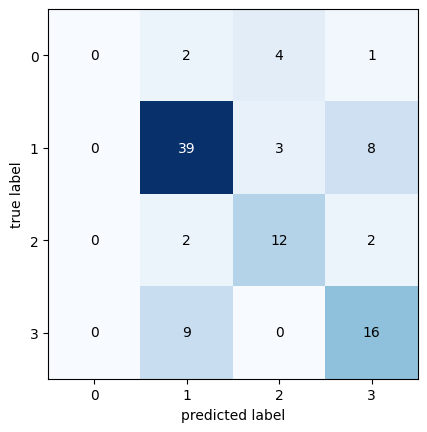

In [74]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(test_y,y_predict)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()